In [5]:
%matplotlib notebook
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from labels import project_positions,create_label
from random_cluster import RandomCluster
from pyqstem import PyQSTEM
from pyqstem.imaging import CTF
from pyqstem.util import atoms_plot
from temnn.net.dataset import DataSet, DataEntry
from temnn.net import mods
from scipy.cluster.hierarchy import fcluster, linkage
from util import discrete_cmap
from ase.io import write
from ase.visualize import view
import os

In [2]:
rc=RandomCluster(4.065,20)

In [13]:
N=424 # antal pixels i det simulerede billede.
sampling=.086 # størrelsen af en pixel i enheder ångstrom.
L=sampling*N # systemets størrelse
num_examples=6
num_classes=1

dir_name='../data/cluster/'
first_number=0

In [14]:

# Make sure working folders exist
if not os.path.exists(dir_name):
    print("Creating folder", dir_name)
    for subf in ['label', 'wave', 'model', 'points']:
        os.makedirs(os.path.join(dir_name, subf))


In [15]:
radius=5+np.random.rand()*9
    
lengths100=np.random.uniform(radius,radius+.2*radius,6)
lengths111=np.random.uniform(radius,radius+.2*radius,8)
    
rc.create_seed(lengths100,lengths111)
rc.build(np.int(np.random.uniform(0,np.sum(rc.active)/3.)),1,.2)
    
atoms=rc.get_cluster('Au')
print(len(atoms))
#atoms_plot(atoms, direction=1)
view(atoms)

337


In [16]:
atoms.center(vacuum=0)
print(atoms.cell)
print(atoms.positions[:4])
view(atoms)
atoms.rotate(v='y', a=45)
print(atoms.positions[:4])
view(atoms)

[[20.325   0.      0.    ]
 [ 0.     22.3575  0.    ]
 [ 0.      0.     22.3575]]
[[ 0.      6.0975 12.195 ]
 [ 0.      8.13   10.1625]
 [ 0.     10.1625  8.13  ]
 [ 0.      8.13   14.2275]]
[[ 8.6231672   6.0975      8.6231672 ]
 [ 7.18597266  8.13        7.18597266]
 [ 5.74877813 10.1625      5.74877813]
 [10.06036173  8.13       10.06036173]]


In [17]:
models_list=[]
sites_list=[]
classes_list=[]

for i in range(num_examples):
    radius=5+np.random.rand()*9
    
    lengths100=np.random.uniform(radius,radius+.2*radius,6)
    lengths111=np.random.uniform(radius,radius+.2*radius,8)
    
    rc.create_seed(lengths100,lengths111)
    rc.build(np.int(np.random.uniform(0,np.sum(rc.active)/3.)),1,.2)
    
    atoms=rc.get_cluster('Au')
    
    atoms.rotate(v='y', a=np.pi/4.)
    
    positions=atoms.get_positions()
    clusters = fcluster(linkage(positions[:,:2]), 1, criterion='distance')
    unique,indices=np.unique(clusters, return_index=True)

    alpha=np.random.rand()*1.5/180.*np.pi
    
    atoms.rotate(v='z', a=np.random.random()*2*np.pi,center='COP')
    atoms.rotate(v='y', a=alpha,center='COP')
    atoms.rotate(v='z', a=np.random.random()*2*np.pi,center='COP')

    alpha=np.random.rand()*1.5/180.*np.pi
    
    atoms.rotate(v='z', a=np.random.random()*2*np.pi,center='COP')
    atoms.rotate(v='y', a=alpha,center='COP')
    atoms.rotate(v='z', a=np.random.random()*2*np.pi,center='COP')
    
    atoms.rotate(v='z', a=np.random.random()*2*np.pi)
    
    atoms.center(vacuum=0)
    size=np.diag(atoms.get_cell())

    atoms.set_cell((L,)*3)
    atoms.center()

    tx=(L-size[0]-5)*(np.random.rand()-.5)
    ty=(L-size[1]-5)*(np.random.rand()-.5)

    atoms.translate((tx,ty,0))
    
    positions=atoms.get_positions()[:,:2]
    
    c=np.array([np.sum(clusters==u) for u in unique])-1
        
    sites_list.append(np.array([np.mean(positions[clusters==u],axis=0) for u in unique]))
    
    
    classes_list.append(c)
    models_list.append(atoms)
    
    print(i)

0
1
2
3
4
5


In [18]:
classes_list[0]

array([1, 1, 2, 2, 2, 3, 4, 4, 5, 5, 0, 0, 0, 0, 0, 1, 1, 2, 2, 4, 4, 5,
       5, 6, 5, 3, 3, 0, 1, 1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 5, 5, 2, 2,
       3, 3, 4, 4, 5, 5, 6, 6, 6, 6, 6, 1, 1, 1, 2, 3, 3, 4, 4, 6, 6, 5,
       6, 5, 6, 6, 6, 7, 0, 5, 5, 6, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 4, 4,
       2, 3, 4, 4, 5, 6, 7, 6, 6, 7, 6, 7, 6, 6, 7, 1, 1, 1, 1, 2, 3, 3,
       3, 4, 5, 4, 0, 0, 1, 1, 2, 3, 4, 4, 5, 4, 5, 6, 5, 6, 6, 0, 0, 1,
       1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 0, 0, 4, 4, 5, 5, 6, 6, 7, 6, 6, 7,
       6, 7, 6, 6, 7, 0, 3, 3, 4, 4, 5, 6, 5, 6, 6, 6, 6, 6, 7, 6, 7, 0,
       2, 2, 3, 3, 4, 4, 5, 6, 6, 6, 7, 5, 6, 6, 6, 1, 1, 2, 2, 3, 4, 5,
       4, 6, 6, 5, 6, 5, 6, 6])

<IPython.core.display.Javascript object>


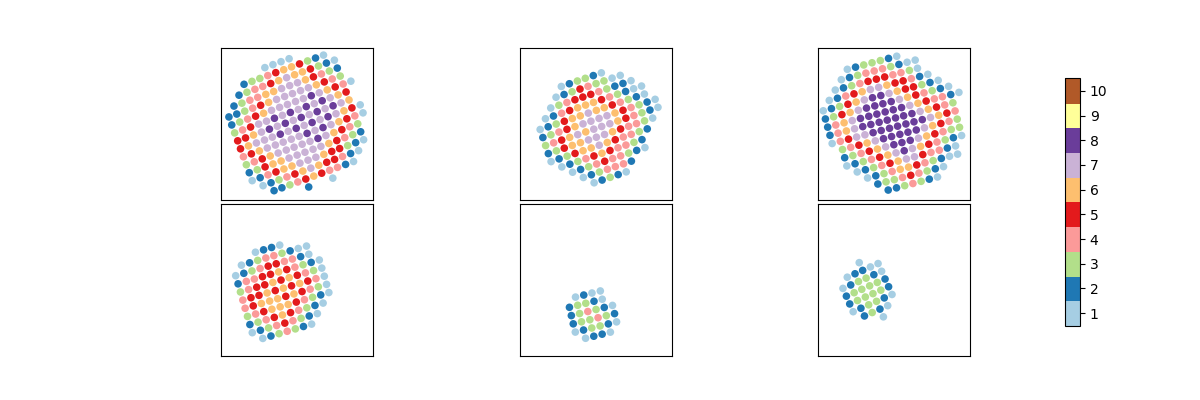

In [19]:
from matplotlib import gridspec

n=2
m=3
M=10

fig=plt.figure(figsize=(12,4))
gs=gridspec.GridSpec(n,m+2,width_ratios=([1,]*m + [.05,.05]))
gs.update(wspace=.025,hspace=.025)

for i in range(n):
    for j in range(m):
        
        k=i*m+j
        
        ax=plt.subplot(gs[i,j])
        
        classes=classes_list[k]
        
        sites=sites_list[k]
        
        #sites=sites[np.argsort(sites[:,2])]
        
        cmap=discrete_cmap(M,'Paired')
        sc=ax.scatter(sites[:,0]/sampling,sites[:,1]/sampling,
                               s=30,vmin=1-0.5,vmax=1+M-.5,c=classes+1,cmap=cmap,lw=0)
        
        ax.set_aspect('equal',adjustable='box')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim([0,N])
        ax.set_ylim([0,N])


inner = gridspec.GridSpecFromSubplotSpec(3,1,subplot_spec=gs[:,4],height_ratios=[1,20,1])
cax=plt.subplot(inner[1])

cbar=plt.colorbar(sc,cax=cax,ticks=np.arange(1,M+1,1),orientation='vertical')
#plt.colorbar(sc, cax=cax, orientation='vertical',ticks=[-5,-2.5,0,2.5,5],label='$\epsilon_p$ [\%]')        

#plt.tight_layout()
plt.show()

In [ ]:
qstem=PyQSTEM('TEM')

for i,model in enumerate(models_list):
    
    wave_size=(int(model.get_cell()[0,0]*15),int(model.get_cell()[1,1]*15))
    
    qstem.set_atoms(model)
    qstem.build_wave('plane',300,wave_size)
    qstem.build_potential(int(model.get_cell()[2,2]*2))
    qstem.run()
    wave=qstem.get_wave()
    
    wave.array=wave.array.astype(np.complex64)
    
    np.savez('{0}/points/points_{1:04d}.npz'.format(dir_name,first_number+i), sites=sites_list[i], classes=classes_list[i])
    wave.save('{0}/wave/wave_{1:04d}.npz'.format(dir_name,first_number+i))
    write('{0}/model/model_{1:04d}.cfg'.format(dir_name,first_number+i),model)
    
    print('iteration',i)
    #clear_output(wait=True)

In [ ]:
def load(data_dir):
    
    models=glob(data_dir+"model/model_*.cfg")
    waves=glob(data_dir+"wave/wave_*.npz")
    #labels=glob(data_dir+"label/label_*.npy")
    points=glob(data_dir+"points/points_*.npz")
    #print(data_dir+"model/model_*.cfg")
    
    entries=[DataEntry(wave=w,points=p,model=m) for w,p,m in zip(waves,points,models)]
    
    return DataSet(entries)

In [ ]:
Cs=-11.5*10**4
defocus=800
#defocus=200
focal_spread=40
blur=2.
dose=None#3*10**2
mtf_param=[1,0,4.89683027e-01,2.34644273e+00]
aberrations={'a22':0,'phi22':np.random.rand()*2*np.pi,'a40':0*10**6}
sampling=.12

data = load(dir_name)
entry=data.next_batch(1)[0]

entry.reset()
entry.load()
ctf=CTF(defocus=defocus,Cs=Cs,focal_spread=focal_spread,aberrations=aberrations)
entry.create_image(ctf,sampling,blur,dose,mtf_param)
entry.create_label(sampling,width=int(1.5/sampling))

image,label,sites,classes=entry.as_tensors(True)

image=mods.local_normalize(image,80,80)

#cmap=discrete_cmap(np.max(classes)+1,'Paired')


fig,axes=plt.subplots(1,2)

#axes[0].plot(sites[:,0]/sampling,sites[:,1]/sampling,'rx')
axes[0].imshow(image[0,:,:,0].T,cmap='gray')

#axes[1].imshow(np.argmax(label[0,:,:,:],axis=2).T,cmap='Paired',vmin=-0.5,vmax=9.5,interpolation='nearest')
#axes[1].imshow(label[0,:,:,0].T,cmap='jet',vmin=0,vmax=1)

#cbar=plt.colorbar(sc,ax=axes[1],ticks=np.linspace(0,np.max(classes),np.max(classes)+1))
#cbar.ax.set_yticklabels(names)

plt.show()


In [ ]:
from matplotlib import gridspec
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=14, serif='cm10')

n=2
m=4

fig=plt.figure(figsize=(10,9.1))
gs=gridspec.GridSpec(n*2,m+2,width_ratios=[1,1,1,1,.1,.1])
gs.update(wspace=.025,hspace=.025)

M=14
data = load(dir_name)


for i in range(n):
    for j in range(m):
        
        Cs=np.random.uniform(-15,-5)*10**4
        defocus=np.random.uniform(40,200)
        
        focal_spread=40
        blur=3.
        dose=4*10**np.random.uniform(2,4)
        
        mtf_param=[1,0,4.89683027e-01,2.34644273e+00]
        
        aberrations={'a22':0,'phi22':np.random.rand()*2*np.pi,'a40':0*10**6}
        sampling=np.random.uniform(.08,.12)
        
        entry=data.next_batch(1)[0]

        entry.reset()
        entry.load()
        ctf=CTF(defocus=defocus,Cs=Cs,focal_spread=focal_spread,aberrations=aberrations)
        entry.create_image(ctf,sampling,blur,dose,mtf_param)
        entry.create_label(sampling,width=int(1.5/sampling))
        
        entry.local_normalize(16/sampling,16/sampling)
        entry.normalize()
        
        image,label,sites,classes,_=entry.as_tensors(True)
        
        
        k=i*m+j
        
        #k=np.random.randint(0,len(models_list))
        
        #positions,counts=project_positions(models[k],distance=.6,return_counts=True)
        #positions/=sampling
        
        #print(np.max(counts))
        
        ax=plt.subplot(gs[i,j])
        
        cmap=discrete_cmap(M,'Paired')
        
        sc=ax.scatter(sites[:,0],sites[:,1],c=np.array(classes),
                   s=25,cmap=cmap,vmin=1-0.5,vmax=1+M-.5,lw=0)
        
        ax.set_aspect('equal',adjustable='box')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim([0,L])
        ax.set_ylim([L,0])
        
        ax=plt.subplot(gs[i+n,j])
        im=ax.imshow(image[0,:,:,0].T,cmap='gray',vmin=-3,vmax=3)
        
        ax.axis('off')
        
        #ax=plt.subplot(gs[i+2,j])
        
        
inner = gridspec.GridSpecFromSubplotSpec(3,1,subplot_spec=gs[:2,4],height_ratios=[1,20,1])
cax=plt.subplot(inner[1])

cbar=plt.colorbar(sc,cax=cax,ticks=np.arange(1,M+1,1),orientation='vertical',label='Column height')
        
inner = gridspec.GridSpecFromSubplotSpec(3,1,subplot_spec=gs[2:,4],height_ratios=[1,20,1])
cax=plt.subplot(inner[1])

cbar=plt.colorbar(im,cax=cax,ticks=np.arange(-3,3.1,2),orientation='vertical',label='Standardized Intensity')

#plt.savefig('cluster_training.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
#print(label.shape,wave.shape)
Cs=-20*10**4
defocus=160
focal_spread=30

ctf=CTF(defocus=defocus,Cs=Cs,focal_spread=focal_spread)
image=wave.apply_ctf(ctf).detect(resample=sampling,blur=.3,dose=10**3)

plt.imshow(image,cmap='gray')

In [ ]:
#print(label.shape,wave.shape)
Cs=-20*10**4
defocus=120
focal_spread=40

ctf=CTF(defocus=defocus,Cs=Cs,focal_spread=focal_spread)
image=wave.apply_ctf(ctf).detect(resample=sampling,blur=.3,dose=10**2)

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,4))

sc=ax1.scatter(positions[:,0],positions[:,1],c=counts,cmap='Paired',s=80)
plt.colorbar(sc,ax=ax1)
ax1.axis('equal')

im=ax2.imshow(np.flipud(image.T),cmap='gray');
ax2.axis('off')
plt.colorbar(im,ax=ax2)

#ax3.imshow(np.flipud(label[:,:,0].T))
#ax3.axis('off')

#plt.tight_layout()